In [1]:
import numpy as np
import random as rand
#import network_equ_xy_energy 
#import network_gen_isotropic 
import openpyxl 
import collections
import timeit
import glob
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from matplotlib import cm
import math
from scipy.optimize import fsolve, root
import scipy.optimize as optimize

In [2]:

title_font = {'fontname':'Arial', 'size':'15', 'color':'black', 'weight':'normal',
              'verticalalignment':'bottom'} # Bottom vertical alignment for more space
axis_font = {'fontname':'Arial', 'size':'13'}


In [3]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [4]:
import tensorflow.keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Activation
import tensorflow.keras.backend as K
K.clear_session()
import tensorflow as tf

In [26]:
fiber_diameter = 0.1
percent_volume_fraction = 0.3
#scaler_mean = np.array([0.161499,0.45089,3.18844,3.22341]) #0.161499,0.45089,3.18844,3.22341
#scaler_std = np.array([0.0879712,0.281284,0.124943,0.164506])#0.0879712,0.281284,0.124943,0.164506
scaler_mean = np.array([0.1625825,0.45157744,3.18819534,3.22309462]) 
scaler_std = np.array([0.08750812,0.28193681,0.12485259,0.16435753])
#scaler_mean = np.array([0.20201773, 0.63851932, 3.18804961, 3.22289804])
#scaler_std = np.array([0.08507515, 0.20928187, 0.12478928, 0.16425357])

model_name = 'scaledall_0_0_mix_1110_00100'
model = tensorflow.keras.models.load_model(model_name, compile=False)

def evalNN(I1,I2):
    #model_name = 'scaled_105_105_mix_110010_15100'
    #model_name = 'scaledall_0_0_mix_1110_00100'
    #model_name = 'scaledall_100_100_mix_1110_00100'
    #model_name = 'convex_model'    
    test_input = np.array([fiber_diameter,percent_volume_fraction,I1,I2])
    rescaled_test_input = ((test_input - scaler_mean)/scaler_std)
    rescaled_test_input  = np.reshape(rescaled_test_input,(1,4))
    pred = model.predict(rescaled_test_input)
    return pred[0] # since pred has the form of [[ 1.298255  -0.8466639]]

In [6]:
## Redoing figure 3 and checking if the degrees of freedom have a significant influence
data_uniax = pd.read_csv('networks_uniaxial.csv')  

In [7]:
data_uniax

seeds  cube_length  fiber_diameter  percent_volume_fraction  \
0       250         21.7             0.1                 0.303669   
1       250         21.7             0.1                 0.303669   
2       250         21.7             0.1                 0.303669   
3       250         21.7             0.1                 0.303669   
4       250         21.7             0.1                 0.303669   
...     ...          ...             ...                      ...   
1095    400         27.0             0.1                 0.311840   
1096    400         27.0             0.1                 0.311840   
1097    400         27.0             0.1                 0.311840   
1098    400         27.0             0.1                 0.311840   
1099    400         27.0             0.1                 0.311840   

      total_fibers  inner_nodes  percent_inner_node  lambdaX   lambdaY  \
0              363          113               0.452    1.000  1.000000   
1              363          113               0.452    1.025  0.987730   
2              363          113               0.452    1.050  0.975900   
3              363          113               0.452    1.075  0.964486   
4              363          113               0.452    1.100  0.953463   
...            ...          ...                 ...      ...       ...   
1095           620          220               0.550    1.150  0.932505   
1096           620          220               0.550    1.175  0.922531   
1097           620          220               0.550    1.200  0.912871   
1098           620          220               0.550    1.225  0.903508   
1099           620          220               0.550    1.250  0.894427   

       lambdaZ   sigmaXX   sigmaYY   sigmaZZ        I1        I2     Psi_f  
0     1.000000  0.000000  0.000000  0.000000  3.000000  3.000000  0.000000  
1     0.987730  0.121986  0.014301 -0.074385  3.001845  3.001814  0.001117  
2     0.975900  0.294865  0.033614 -0.099197  3.007262  3.007029  0.015254  
3     0.964486  0.459346  0.082632 -0.130885  3.016090  3.015333  0.009475  
4     0.953463  0.676919  0.123164 -0.171480  3.028182  3.026446  0.017585  
...        ...       ...       ...       ...       ...       ...       ...  
1095  0.932505  1.384228  0.208731 -0.073524  3.061630  3.056144  0.076462  
1096  0.922531  1.682580  0.261614 -0.073218  3.082753  3.074310  0.086028  
1097  0.912871  2.145718  0.318212 -0.066908  3.106667  3.094444  0.132875  
1098  0.903508  2.596727  0.379491 -0.058459  3.133278  3.116389  0.169393  
1099  0.894427  3.068065  0.444161 -0.021716  3.162500  3.140000  0.216330  

[1100 rows x 16 columns]

In [8]:
data_biaxial = pd.read_csv('biaxial_networks_optimized_dri.csv')  

In [9]:
data_biaxial

seeds  cube_length  fiber_diameter  percent_volume_fraction  \
0        450         29.0             0.1                 0.292359   
1        450         29.0             0.1                 0.292359   
2        450         29.0             0.1                 0.292359   
3        450         29.0             0.1                 0.292359   
4        450         29.0             0.1                 0.292359   
...      ...          ...             ...                      ...   
12095    250         21.7             0.1                 0.316878   
12096    250         21.7             0.1                 0.316878   
12097    250         21.7             0.1                 0.316878   
12098    250         21.7             0.1                 0.316878   
12099    250         21.7             0.1                 0.316878   

       total_fibers  inner_nodes  percent_inner_node  lambdaX  lambdaY  \
0               738          288               0.640     1.00    1.000   
1               738          288               0.640     1.00    1.025   
2               738          288               0.640     1.00    1.050   
3               738          288               0.640     1.00    1.075   
4               738          288               0.640     1.00    1.100   
...             ...          ...                 ...      ...      ...   
12095           357          107               0.428     1.25    1.150   
12096           357          107               0.428     1.25    1.175   
12097           357          107               0.428     1.25    1.200   
12098           357          107               0.428     1.25    1.225   
12099           357          107               0.428     1.25    1.250   

        lambdaZ  ...        I2  total_psif   dPsidI1   dPsidI2  \
0      1.000000  ...  3.000000    0.000000  1.759651 -0.909827   
1      0.975610  ...  3.002439    0.001174  1.759839 -0.912627   
2      0.952381  ...  3.009529    0.004755  1.760763 -0.920571   
3      0.930233  ...  3.020958    0.011362  1.763467 -0.932753   
4      0.909091  ...  3.036446    0.032683  1.769588 -0.948002   
...         ...  ...       ...         ...       ...       ...   
12095  0.695652  ...  3.462550    0.213114  1.723018 -0.718314   
12096  0.680851  ...  3.521536    0.236111  1.756516 -0.710237   
12097  0.666667  ...  3.584444    0.262421  1.787910 -0.701420   
12098  0.653061  ...  3.651116    0.292465  1.816131 -0.691899   
12099  0.640000  ...  3.721406    0.326438  1.840093 -0.681723   

       rho_unRestrict  phi_1_unRestrict  phi_2_unRestrict  rho_Restrict  \
0            5.338963          1.759653         -0.909829      3.519301   
1            5.319109          1.755237         -0.917299      3.447861   
2            5.297229          1.748398         -0.933556      3.291306   
3            5.284309          1.751929         -0.946232      3.103933   
4            5.264034          1.776169         -0.946155      2.914793   
...               ...               ...               ...           ...   
12095        3.787812          2.052270         -0.419053      1.882327   
12096        3.640678          2.059541         -0.389245      1.791045   
12097        3.475294          2.067960         -0.356191      1.710134   
12098        3.294005          2.079088         -0.320139      1.643063   
12099        3.106163          2.094950         -0.283509      1.588102   

       phi_1_Restrict  phi_2_Restrict  
0            1.759651   -6.730730e-16  
1            1.737672    3.677610e-16  
2            1.682170    4.727120e-16  
3            1.615551    1.320710e-15  
4            1.561808    1.558090e-15  
...               ...             ...  
12095        1.634572    8.928840e-17  
12096        1.647517   -6.899380e-17  
12097        1.670251    1.029390e-16  
12098        1.704432    1.298670e-16  
12099        1.749259   -1.471470e-16  

[12100 rows x 24 columns]

In [10]:
# NH and Ogden material models
def eval_sigma_NH(mu,lamx,lamy):
    lamz = 1./(lamx*lamy)
    bmat = np.array([[lamx**2,0,0],[0,lamy**2,0],[0,0,lamz**2]])
    p = mu*bmat[2,2]
    sigma = -p*np.eye(3)+mu*bmat
    return sigma[0,0],sigma[1,1]

# Mooney
def eval_sigma_MR(mu1,mu2,lamx,lamy):
    # sigma = -p*I + mu1*b + mu2*(I1*I-b)
    lamz = 1./(lamx*lamy)
    I1 = lamx**2+lamy**2+lamz**2
    I2 = lamx**2 * lamy**2 + lamx**2 * lamz**2 + lamy**2 * lamz**2
    Psi1 = mu1
    Psi2 = mu2
    p = + 2 * Psi1 * lamz ** 2 + 2*Psi2*(I1*lamz**2-lamz**4)
    sigmax = -p + 2 * Psi1 * lamx ** 2 + 2*Psi2*(I1*lamx**2-lamx**4)
    sigmay = -p + 2 * Psi1 * lamy ** 2 + 2*Psi2*(I1*lamy**2-lamy**4)
    return sigmax, sigmay

def eval_sigma_Ogden(mu, alpha,lamx,lamy):
    lamz = 1./(lamx*lamy)
    p = mu*lamz**alpha
    sigmax = -p+mu*lamx**alpha
    sigmay = -p+mu*lamy**alpha
    return sigmax,sigmay

def eval_sigma_NN(lamx,lamy):
    lamz = 1./(lamx*lamy)
    I1 = lamx**2+lamy**2+lamz**2
    I2 = lamx**2 * lamy**2 + lamx**2 * lamz**2 + lamy**2 * lamz**2
    Psi1,Psi2 = evalNN(I1,I2)
    print('NN eval Psi1=%f Psi2=%f'%(Psi1,Psi2))
    #p = 2 * Psi1 * lamz ** 2 - 2 * Psi2 * lamz ** (-2)
    #sigmax = -p + 2 * Psi1 * lamx ** 2 - 2 * Psi2 * lamx ** (-2)
    #sigmay = -p + 2 * Psi1 * lamy ** 2 - 2 * Psi2 * lamy ** (-2)
            
    p = + 2 * Psi1 * lamz ** 2 + 2*Psi2*(I1*lamz**2-lamz**4)
    sigmax = -p + 2 * Psi1 * lamx ** 2 + 2*Psi2*(I1*lamx**2-lamx**4)
    sigmay = -p + 2 * Psi1 * lamy ** 2 + 2*Psi2*(I1*lamy**2-lamy**4)
    return sigmax,sigmay
    


In [58]:
# Objective function 
def objective_NH(mu):
    # loop over ALL data
    n_data = 12100
    error = 0
    for i in range(n_data):
        lamdaX = data_biaxial['lambdaX'][i]
        lamdaY = data_biaxial['lambdaY'][i]
        sigmaX = data_biaxial['sigmaXX'][i]
        sigmaY = data_biaxial['sigmaYY'][i]
        sigmaX_NH, sigmaY_NH = eval_sigma_NH(mu,lamdaX,lamdaY)
        #error+= (sigmaX_NH-sigmaX)**2/sigmaX**2+(sigmaY_NH-sigmaY)**2/sigmaY**2
        error+= (sigmaX_NH-sigmaX)**2+(sigmaY_NH-sigmaY)**2
    error = np.sqrt(error/n_data)
    return error

def objective_MR(x):
    mu1 = x[0]
    mu2 = x[1]
    # loop over ALL data
    n_data = 12100
    error = 0
    for i in range(n_data):
        lamdaX = data_biaxial['lambdaX'][i]
        lamdaY = data_biaxial['lambdaY'][i]
        sigmaX = data_biaxial['sigmaXX'][i]
        sigmaY = data_biaxial['sigmaYY'][i]
        sigmaX_MR, sigmaY_MR = eval_sigma_MR(mu1, mu2,lamdaX,lamdaY)
        #error+= (sigmaX_NH-sigmaX)**2/sigmaX**2+(sigmaY_NH-sigmaY)**2/sigmaY**2
        error+= (sigmaX_MR-sigmaX)**2+(sigmaY_MR-sigmaY)**2
    error = np.sqrt(error/n_data)
    return error
        
def objective_Ogden(x):
    mu=x[0]
    alpha=x[1]
    # loop over ALL data
    n_data = 12100
    error = 0
    for i in range(n_data):
        lamdaX = data_biaxial['lambdaX'][i]
        lamdaY = data_biaxial['lambdaY'][i]
        sigmaX = data_biaxial['sigmaXX'][i]
        sigmaY = data_biaxial['sigmaYY'][i]
        sigmaX_Ogden, sigmaY_Ogden = eval_sigma_Ogden(mu,alpha,lamdaX,lamdaY)
        #error+= (sigmaX_Ogden-sigmaX)**2/sigmaX**2+(sigmaY_Ogden-sigmaY)**2/sigmaY**2
        error+= (sigmaX_Ogden-sigmaX)**2+(sigmaY_Ogden-sigmaY)**2
    error = np.sqrt(error/n_data)
    return error

In [15]:
# RUN optimizer
initial_guess_NH = [1.]
result_NH = optimize.minimize(objective_NH, initial_guess_NH)
if result_NH.success:
    print('fitted params')
    print(result_NH.x)
else:
    print("unable to have a good solution")

fitted params
[2.5101448]


In [61]:
# RUN optimizer
initial_guess_MR = [1.,-1.]
result_MR = optimize.minimize(objective_MR, initial_guess_MR)
if result_MR.success:
    print('fitted params')
    print(result_MR.x)
else:
    print("unable to have a good solution")

fitted params
[1.08743699 0.12783228]


In [17]:
# RUN optimizer
initial_guess_Ogden = [2.,1.0]
result_Ogden = optimize.minimize(objective_Ogden, initial_guess_Ogden)
if result_Ogden.success:
    print('fitted params')
    print(result_Ogden.x)
else:
    print("unable to have a good solution")

fitted params
[0.4985708  8.52112645]


In [27]:
## Plot stress in x for uniaxial between data and fits with NH or Ogden  

n_data = 1100

# I think there are 100 RVEs for this microstructure
sigmaX_uni = np.zeros((11,100))
Psi_uni = np.zeros((11,100))
Psi_uni_wrong = np.zeros((11,100))

#
sigmaX_uni_NH = np.zeros((11))
sigmaX_uni_MR = np.zeros((11))
sigmaX_uni_Ogden = np.zeros((11))
#
sigmaX_uni_NN = np.zeros((11))

# I want to extract the ones with higher number of degrees of freedom 
# there are actually only 14 curves with inner_node_percent>60%
sigmaX_uni_HD = np.zeros((11,100))
Psi_uni_HD = np.zeros((11,100))
Psi_uni_HD_wrong = np.zeros((11,100))

# store the volume fraction per sample
theta_dist = np.zeros((100))
theta_dist_HD = np.zeros((100))

# store the seeds per sample
seeds_dist = np.zeros((100))
seeds_dist_HD = np.zeros((100))

# store the seeds per sample
dof_dist = np.zeros((100))


lamdaX_uni = np.zeros((11))
sample_cnt = 0
sample_HD = 0
step_cnt = 0
for i in range(n_data):
    lamdaX = data_uniax['lambdaX'][i]
    if sample_cnt==0:
        lamdaX_uni[step_cnt] = lamdaX
        lamdaY = 1./np.sqrt(lamdaX)
        sigmaX_uni_NN[step_cnt] = eval_sigma_NN(lamdaX,lamdaY)[0]
        sigmaX_uni_NH[step_cnt] = eval_sigma_NH(2.5101448,lamdaX,lamdaY)[0]
        sigmaX_uni_MR[step_cnt] = eval_sigma_MR(1.08743699, 0.12783228,lamdaX,lamdaY)[0]
        sigmaX_uni_Ogden[step_cnt] = eval_sigma_Ogden(0.4985708, 8.52112645,lamdaX,lamdaY)[0]
    sigmaX_uni[step_cnt,sample_cnt]=data_uniax['sigmaXX'][i]
    Psi_uni[step_cnt,sample_cnt]=data_uniax['Psi_f'][i]/data_uniax['cube_length'][i]**2*1000
    Psi_uni_wrong[step_cnt,sample_cnt]=data_uniax['Psi_f'][i]
    if data_uniax['percent_inner_node'][i]>=0.55:
        sigmaX_uni_HD[step_cnt,sample_HD]=data_uniax['sigmaXX'][i]
        Psi_uni_HD[step_cnt,sample_HD]=data_uniax['Psi_f'][i]/data_uniax['cube_length'][i]**2*1000
        Psi_uni_HD_wrong[step_cnt,sample_HD]=data_uniax['Psi_f'][i]
    step_cnt +=1
    if lamdaX==1.25:
        theta_dist[sample_cnt] = data_uniax['percent_volume_fraction'][i]
        seeds_dist[sample_cnt] = data_uniax['seeds'][i]
        dof_dist[sample_cnt] = data_uniax['percent_inner_node'][i]
        sample_cnt+=1
        if data_uniax['percent_inner_node'][i]>=0.55:
            theta_dist_HD[sample_HD] = data_uniax['percent_volume_fraction'][i]
            seeds_dist_HD[sample_HD] = data_uniax['seeds'][i]
            sample_HD+=1
        step_cnt=0
print(sample_HD)

NN eval Psi1=2.411019 Psi2=-1.473557
NN eval Psi1=2.414806 Psi2=-1.472542
NN eval Psi1=2.425572 Psi2=-1.469302
NN eval Psi1=2.442506 Psi2=-1.463576
NN eval Psi1=2.464891 Psi2=-1.455142
NN eval Psi1=2.492093 Psi2=-1.443812
NN eval Psi1=2.501676 Psi2=-1.418906
NN eval Psi1=2.503434 Psi2=-1.385240
NN eval Psi1=2.502818 Psi2=-1.345534
NN eval Psi1=2.536728 Psi2=-1.317182
NN eval Psi1=2.576384 Psi2=-1.286770
48


In [28]:
Psi_uni[0,:] = 0
x_axis = np.round(np.arange(1,1.251,0.025), decimals=3)
sigma_mean = np.zeros((11))
sigma_std =  np.zeros((11))
psi_mean =   np.zeros((11))
psi_std =   np.zeros((11))
for i in range(11):
    sigma_mean[i] = sigmaX_uni[i,:].mean()
    sigma_std[i] = sigmaX_uni[i,:].std()
    psi_mean[i] = Psi_uni[i,:].mean()
    psi_std[i] = Psi_uni[i,:].std()

sigma_confidence = 1.96*np.array(sigma_std)
sigma_down = np.array(sigma_mean) - np.array(sigma_confidence)
sigma_up = np.array(sigma_mean) + np.array(sigma_confidence)

psi_confidence = 1.96*np.array(psi_std)
psi_down = np.array(psi_mean) - np.array(psi_confidence)
psi_up = np.array(psi_mean) + np.array(psi_confidence)


Text(0.5,0,'$\\mathrm{\\lambda_x}$')

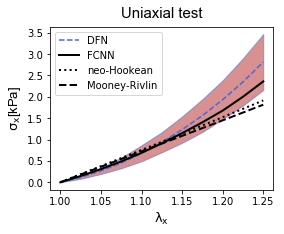

In [29]:
fig, ax = plt.subplots(figsize=(4,3))

plt.plot(x_axis, sigma_mean, color='royalblue', linestyle='dashed',label='DFN')
plt.fill_between(x_axis, sigma_down, sigma_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
plt.plot(x_axis, sigmaX_uni_NN, color='black',linestyle='solid',linewidth=2,label='FCNN')
plt.plot(x_axis, sigmaX_uni_NH, color='black',linestyle='dotted',linewidth=2,label='neo-Hookean')
plt.plot(x_axis, sigmaX_uni_MR, color='black',linestyle='dashed',linewidth=2,label='Mooney-Rivlin')
#plt.plot(x_axis, sigmaX_uni_Ogden, color='black',linestyle='dashdot',linewidth=2,label='Ogden')

#textstr = '\n'.join(('\u03F4' +' ~ 0.3%', '\u03C6 = 0.1 ' + '\u03BC' + 'm'))
#props = dict(boxstyle='round', facecolor='royalblue', alpha=0.5)
#ax.text(0.05, 0.95, textstr, transform=ax.transAxes, fontsize=12,
#        verticalalignment='top', bbox=props)
plt.legend(loc=2)
plt.ylabel(r'$\mathrm{\sigma_x}$[kPa]',**axis_font)
plt.title('Uniaxial test',**title_font)
plt.xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
#plt.savefig('sigmax_uniaxial_NH_Ogden_non-convex.pdf', dpi = 300, bbox_inches='tight') 


In [30]:
# plot the lambdax vs sigmax and lambda_x vs sigmay for equi-biaxial, for all RVEs
n_data = 12100
# I dont know how many samples I have, but we can create a big matrix and see 
# After running it once I found that the total number of RVEs is 100
# so repeating and storing only 100
sigmaX_equi = np.zeros((11,100))
sigmaY_equi = np.zeros((11,100))
#
sigmaX_strip = np.zeros((11,100))
sigmaY_strip = np.zeros((11,100))
#
sigmaX_equi_NH = np.zeros((11))
sigmaY_equi_NH = np.zeros((11))
#
sigmaX_equi_MR = np.zeros((11))
sigmaY_equi_MR = np.zeros((11))
#
sigmaX_equi_Ogden = np.zeros((11))
sigmaY_equi_Ogden = np.zeros((11))
#
sigmaX_strip_NH = np.zeros((11))
sigmaY_strip_NH = np.zeros((11))
#
sigmaX_strip_MR = np.zeros((11))
sigmaY_strip_MR = np.zeros((11))
#
sigmaX_strip_Ogden = np.zeros((11))
sigmaY_strip_Ogden = np.zeros((11))
#
sigmaX_equi_NN = np.zeros((11))
sigmaY_equi_NN = np.zeros((11))
#
sigmaX_strip_NN = np.zeros((11))
sigmaY_strip_NN = np.zeros((11))


#
Psi_equi = np.zeros((11,100))
Psi_equi_density = np.zeros((11,100))
#
Psi1_equi = np.zeros((11,100))
Psi2_equi = np.zeros((11,100))
#
Psi1_unrestrict_equi = np.zeros((11,100))
Psi2_unrestrict_equi = np.zeros((11,100))
#
Psi1_restrict_equi = np.zeros((11,100))
Psi2_restrict_equi = np.zeros((11,100))


# I want to extract the ones with higher number of degrees of freedom 
# this is for the ones with higher degrees of freedom
# there are actually only 14 curves with inner_node_percent>60%
# there are more if the cutoff is >=55%
sigmaX_equi_HD = np.zeros((11,100))
sigmaY_equi_HD = np.zeros((11,100))
#
Psi_equi_HD = np.zeros((11,100))
Psi_equi_density_HD = np.zeros((11,100))
#
Psi1_equi_HD = np.zeros((11,100))
Psi2_equi_HD = np.zeros((11,100))
#
Psi1_unrestrict_equi_HD = np.zeros((11,100))
Psi2_unrestrict_equi_HD = np.zeros((11,100))
#
Psi1_restrict_equi_HD = np.zeros((11,100))
Psi2_restrict_equi_HD = np.zeros((11,100))


lamdaX_equi = np.zeros((11))
sample_cnt = 0
sample_HD = 0
step_cnt = 0
for i in range(n_data):
    lamdaX = data_biaxial['lambdaX'][i]
    lamdaY = data_biaxial['lambdaY'][i]
    if lamdaX==lamdaY:
        if sample_cnt==0:
            lamdaX_equi[step_cnt] = lamdaX
            sigmaX_equi_NN[step_cnt],sigmaY_equi_NN[step_cnt] = eval_sigma_NN(lamdaX,lamdaY)
            sigmaX_equi_NH[step_cnt],sigmaY_equi_NH[step_cnt] = eval_sigma_NH(2.5101448,lamdaX,lamdaY)
            sigmaX_equi_MR[step_cnt],sigmaY_equi_MR[step_cnt] = eval_sigma_MR(1.08743699, 0.12783228,lamdaX,lamdaY)
            sigmaX_equi_Ogden[step_cnt],sigmaY_equi_Ogden[step_cnt] = eval_sigma_Ogden(0.4985708, 8.52112645,lamdaX,lamdaY)
        sigmaX_equi[step_cnt,sample_cnt]=data_biaxial['sigmaXX'][i]
        sigmaY_equi[step_cnt,sample_cnt]=data_biaxial['sigmaYY'][i]
        Psi_equi[step_cnt,sample_cnt]=data_biaxial['total_psif'][i]
        Psi_equi_density[step_cnt,sample_cnt]=data_biaxial['total_psif'][i]/(data_biaxial['cube_length'][i]**2)
        Psi1_equi[step_cnt,sample_cnt]=data_biaxial['dPsidI1'][i]
        Psi2_equi[step_cnt,sample_cnt]=data_biaxial['dPsidI2'][i]
        Psi1_unrestrict_equi[step_cnt,sample_cnt]=data_biaxial['phi_1_unRestrict'][i]
        Psi2_unrestrict_equi[step_cnt,sample_cnt]=data_biaxial['phi_2_unRestrict'][i]
        Psi1_restrict_equi[step_cnt,sample_cnt]=data_biaxial['phi_1_Restrict'][i]
        Psi2_restrict_equi[step_cnt,sample_cnt]=data_biaxial['phi_2_Restrict'][i]
        if data_biaxial['percent_inner_node'][i]>=0.55:
            sigmaX_equi_HD[step_cnt,sample_HD]=data_biaxial['sigmaXX'][i]
            sigmaY_equi_HD[step_cnt,sample_HD]=data_biaxial['sigmaYY'][i]
            Psi_equi_HD[step_cnt,sample_HD]=data_biaxial['total_psif'][i]
            Psi_equi_density_HD[step_cnt,sample_HD]=data_biaxial['total_psif'][i]/(data_biaxial['cube_length'][i]**2)
            Psi1_equi_HD[step_cnt,sample_HD]=data_biaxial['dPsidI1'][i]
            Psi2_equi_HD[step_cnt,sample_HD]=data_biaxial['dPsidI2'][i]
            Psi1_unrestrict_equi_HD[step_cnt,sample_HD]=data_biaxial['phi_1_unRestrict'][i]
            Psi2_unrestrict_equi_HD[step_cnt,sample_HD]=data_biaxial['phi_2_unRestrict'][i]
            Psi1_restrict_equi_HD[step_cnt,sample_HD]=data_biaxial['phi_1_Restrict'][i]
            Psi2_restrict_equi_HD[step_cnt,sample_HD]=data_biaxial['phi_2_Restrict'][i]
        step_cnt +=1
        if lamdaX==1.25:
            sample_cnt+=1
            if data_biaxial['percent_inner_node'][i]>=0.55:
                sample_HD+=1
            step_cnt=0
lamdaX_strip = np.zeros((11))
sample_cnt = 0
step_cnt = 0
for i in range(n_data):
    lamdaX = data_biaxial['lambdaX'][i]
    lamdaY = data_biaxial['lambdaY'][i]
    if lamdaY==1.0:
        #print('step %i'%step_cnt)
        #print('lamX = %f, lamY = %f'%(lamdaX,lamdaY))
        if sample_cnt==0:
            lamdaX_strip[step_cnt] = lamdaX
            sigmaX_strip_NN[step_cnt],sigmaY_strip_NN[step_cnt] = eval_sigma_NN(lamdaX,lamdaY)
            sigmaX_strip_NH[step_cnt],sigmaY_strip_NH[step_cnt] = eval_sigma_NH(2.5101448,lamdaX,lamdaY)
            sigmaX_strip_MR[step_cnt],sigmaY_strip_MR[step_cnt] = eval_sigma_MR(1.08743699, 0.12783228,lamdaX,lamdaY)
            sigmaX_strip_Ogden[step_cnt],sigmaY_strip_Ogden[step_cnt] = eval_sigma_Ogden(0.4985708, 8.52112645,lamdaX,lamdaY)
        sigmaX_strip[step_cnt,sample_cnt]=data_biaxial['sigmaXX'][i]
        sigmaY_strip[step_cnt,sample_cnt]=data_biaxial['sigmaYY'][i]
        step_cnt +=1
        if lamdaX==1.25:
            sample_cnt+=1
            step_cnt=0

NN eval Psi1=2.411019 Psi2=-1.473557
NN eval Psi1=2.426923 Psi2=-1.470415
NN eval Psi1=2.475130 Psi2=-1.463605
NN eval Psi1=2.556388 Psi2=-1.456656
NN eval Psi1=2.657416 Psi2=-1.445898
NN eval Psi1=2.831373 Psi2=-1.457629
NN eval Psi1=3.040967 Psi2=-1.416657
NN eval Psi1=3.343213 Psi2=-1.374829
NN eval Psi1=3.517963 Psi2=-1.330734
NN eval Psi1=3.774950 Psi2=-1.325678
NN eval Psi1=3.898117 Psi2=-1.260896
NN eval Psi1=2.411019 Psi2=-1.473557
NN eval Psi1=2.416152 Psi2=-1.472306
NN eval Psi1=2.431070 Psi2=-1.468670
NN eval Psi1=2.455116 Psi2=-1.462810
NN eval Psi1=2.487706 Psi2=-1.454867
NN eval Psi1=2.528320 Psi2=-1.444969
NN eval Psi1=2.550533 Psi2=-1.420744
NN eval Psi1=2.574908 Psi2=-1.392381
NN eval Psi1=2.637273 Psi2=-1.376965
NN eval Psi1=2.717636 Psi2=-1.365358
NN eval Psi1=2.780010 Psi2=-1.335017


In [31]:
x_axis = np.round(np.arange(1,1.251,0.025), decimals=3)
sigmaX_equi_mean = np.zeros((11))
sigmaX_equi_std =  np.zeros((11))
sigmaX_strip_mean = np.zeros((11))
sigmaX_strip_std =  np.zeros((11))
sigmaY_equi_mean = np.zeros((11))
sigmaY_equi_std =  np.zeros((11))
sigmaY_strip_mean = np.zeros((11))
sigmaY_strip_std =  np.zeros((11))
for i in range(11):
    sigmaX_equi_mean[i] = sigmaX_equi[i,:].mean()
    sigmaX_equi_std[i] = sigmaX_equi[i,:].std()
    sigmaY_equi_mean[i] = sigmaY_equi[i,:].mean()
    sigmaY_equi_std[i] = sigmaY_equi[i,:].std()
    sigmaX_strip_mean[i] = sigmaX_strip[i,:].mean()
    sigmaX_strip_std[i] = sigmaX_strip[i,:].std()
    sigmaY_strip_mean[i] = sigmaY_strip[i,:].mean()
    sigmaY_strip_std[i] = sigmaY_strip[i,:].std()
sigmaX_equi_confidence = 1.96*np.array(sigmaX_equi_std)
sigmaX_equi_down = np.array(sigmaX_equi_mean) - np.array(sigmaX_equi_confidence)
sigmaX_equi_up = np.array(sigmaX_equi_mean) + np.array(sigmaX_equi_confidence)
sigmaY_equi_confidence = 1.96*np.array(sigmaY_equi_std)
sigmaY_equi_down = np.array(sigmaY_equi_mean) - np.array(sigmaY_equi_confidence)
sigmaY_equi_up = np.array(sigmaY_equi_mean) + np.array(sigmaY_equi_confidence)
#
sigmaX_strip_confidence = 1.96*np.array(sigmaX_strip_std)
sigmaX_strip_down = np.array(sigmaX_strip_mean) - np.array(sigmaX_strip_confidence)
sigmaX_strip_up = np.array(sigmaX_strip_mean) + np.array(sigmaX_strip_confidence)
sigmaY_strip_confidence = 1.96*np.array(sigmaY_strip_std)
sigmaY_strip_down = np.array(sigmaY_strip_mean) - np.array(sigmaY_strip_confidence)
sigmaY_strip_up = np.array(sigmaY_strip_mean) + np.array(sigmaY_strip_confidence)

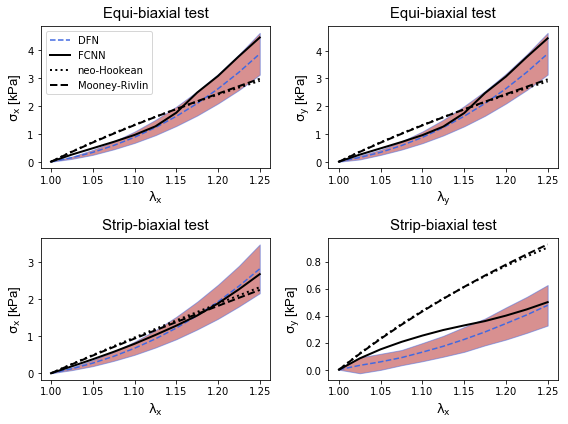

In [32]:
fig, axs = plt.subplots(2,2,figsize=(8,6))

axs[0,0].plot(x_axis, sigmaX_equi_mean, color='royalblue', linestyle='dashed',label='DFN')
axs[0,0].fill_between(x_axis, sigmaX_equi_down, sigmaX_equi_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[0,0].plot(x_axis, sigmaX_equi_NN, color='black', linestyle='solid',linewidth=2,label='FCNN')
axs[0,0].plot(x_axis, sigmaX_equi_NH, color='black', linestyle='dotted',linewidth=2,label='neo-Hookean')
axs[0,0].plot(x_axis, sigmaX_equi_MR, color='black', linestyle='dashed',linewidth=2,label='Mooney-Rivlin')
#axs[0,0].plot(x_axis, sigmaX_equi_Ogden, color='black', linestyle='dashdot',linewidth=2,label='Ogden')
axs[0,0].set_ylabel(r'$\mathrm{\sigma_x}$ [kPa]',**axis_font)
axs[0,0].set_xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
axs[0,0].set_title('Equi-biaxial test',**title_font)
axs[0,0].legend(loc=2)

axs[0,1].plot(x_axis, sigmaY_equi_mean, color='royalblue', linestyle='dashed')
axs[0,1].fill_between(x_axis, sigmaY_equi_down, sigmaY_equi_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[0,1].plot(x_axis, sigmaY_equi_NN, color='black', linestyle='solid',linewidth=2)
axs[0,1].plot(x_axis, sigmaY_equi_NH, color='black', linestyle='dotted',linewidth=2)
axs[0,1].plot(x_axis, sigmaY_equi_MR, color='black', linestyle='dashed',linewidth=2)
#axs[0,1].plot(x_axis, sigmaY_equi_Ogden, color='black', linestyle='dashdot',linewidth=2)
axs[0,1].set_ylabel(r'$\mathrm{\sigma_y}$ [kPa]',**axis_font)
axs[0,1].set_xlabel(r'$\mathrm{\lambda_y}$',**axis_font )
axs[0,1].set_title('Equi-biaxial test',**title_font)

axs[1,0].plot(x_axis, sigmaX_strip_mean, color='royalblue', linestyle='dashed')
axs[1,0].fill_between(x_axis, sigmaX_strip_down, sigmaX_strip_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[1,0].plot(x_axis, sigmaX_strip_NN, color='black', linestyle='solid',linewidth=2)
axs[1,0].plot(x_axis, sigmaX_strip_NH, color='black', linestyle='dotted',linewidth=2)
axs[1,0].plot(x_axis, sigmaX_strip_MR, color='black', linestyle='dashed',linewidth=2)
#axs[1,0].plot(x_axis, sigmaX_strip_Ogden, color='black', linestyle='dashdot',linewidth=2)
axs[1,0].set_ylabel(r'$\mathrm{\sigma_x}$ [kPa]',**axis_font)
axs[1,0].set_xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
axs[1,0].set_title('Strip-biaxial test',**title_font)

axs[1,1].plot(x_axis, sigmaY_strip_mean, color='royalblue', linestyle='dashed')
axs[1,1].fill_between(x_axis, sigmaY_strip_down, sigmaY_strip_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[1,1].plot(x_axis, sigmaY_strip_NN, color='black', linestyle='solid',linewidth=2)
axs[1,1].plot(x_axis, sigmaY_strip_NH, color='black', linestyle='dotted',linewidth=2)
axs[1,1].plot(x_axis, sigmaY_strip_MR, color='black', linestyle='dashed',linewidth=2)
#axs[1,1].plot(x_axis, sigmaY_strip_Ogden, color='black', linestyle='dashdot',linewidth=2)
axs[1,1].set_ylabel(r'$\mathrm{\sigma_y}$ [kPa]',**axis_font)
axs[1,1].set_xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
axs[1,1].set_title('Strip-biaxial test',**title_font)

plt.tight_layout()
#plt.savefig('sigma_biaxial_NH_Ogden_non-convex.pdf', dpi = 300, bbox_inches='tight') 

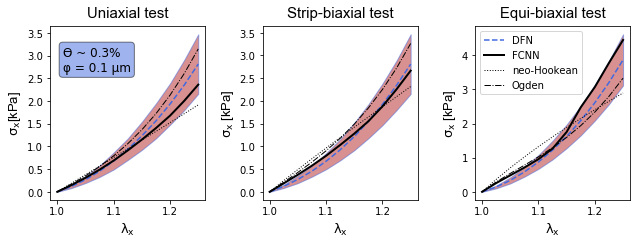

In [35]:
## The best ones to show here are the uniaxial, strip biaxial, and equi-biaxial tests for sigma x
fig, axs = plt.subplots(1,3,figsize=(9,3.5))
axs[0].plot(x_axis, sigma_mean, color='royalblue', linestyle='dashed',label='DFN')
axs[0].fill_between(x_axis, sigma_down, sigma_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[0].plot(x_axis, sigmaX_uni_NN, color='black',linestyle='solid',linewidth=2,label='FCNN')
axs[0].plot(x_axis, sigmaX_uni_NH, color='black',linestyle='dotted',linewidth=1,label='neo-Hookean')
axs[0].plot(x_axis, sigmaX_uni_Ogden, color='black',linestyle='dashdot',linewidth=1,label='Ogden')

textstr = '\n'.join(('\u03F4' +' ~ 0.3%', '\u03C6 = 0.1 ' + '\u03BC' + 'm'))
props = dict(boxstyle='round', facecolor='royalblue', alpha=0.5)
axs[0].text(0.12, 1.05, textstr, transform=ax.transAxes, fontsize=12,
        verticalalignment='top', bbox=props)
#plt.legend(loc=2)
axs[0].set_ylabel(r'$\mathrm{\sigma_x}$[kPa]',**axis_font)
axs[0].set_title('Uniaxial test',**title_font)
axs[0].set_xlabel(r'$\mathrm{\lambda_x}$',**axis_font )


axs[2].plot(x_axis, sigmaX_equi_mean, color='royalblue', linestyle='dashed',label='DFN')
axs[2].fill_between(x_axis, sigmaX_equi_down, sigmaX_equi_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[2].plot(x_axis, sigmaX_equi_NN, color='black', linestyle='solid',linewidth=2,label='FCNN')
axs[2].plot(x_axis, sigmaX_equi_NH, color='black', linestyle='dotted',linewidth=1,label='neo-Hookean')
axs[2].plot(x_axis, sigmaX_equi_Ogden, color='black', linestyle='dashdot',linewidth=1,label='Ogden')
axs[2].set_ylabel(r'$\mathrm{\sigma_x}$ [kPa]',**axis_font)
axs[2].set_xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
axs[2].set_title('Equi-biaxial test',**title_font)
axs[2].legend(loc=2)
#axs[0,0].legend(loc=2)

axs[1].plot(x_axis, sigmaX_strip_mean, color='royalblue', linestyle='dashed',label='DFN')
axs[1].fill_between(x_axis, sigmaX_strip_down, sigmaX_strip_up, alpha=0.5, edgecolor='royalblue', facecolor='firebrick')
axs[1].plot(x_axis, sigmaX_strip_NN, color='black', linestyle='solid',linewidth=2,label='FCNN')
axs[1].plot(x_axis, sigmaX_strip_NH, color='black', linestyle='dotted',linewidth=1,label='neo-Hookean')
axs[1].plot(x_axis, sigmaX_strip_Ogden, color='black', linestyle='dashdot',linewidth=1,label='Ogden')
#axs[1].legend(loc=2)
axs[1].set_ylabel(r'$\mathrm{\sigma_x}$ [kPa]',**axis_font)
axs[1].set_xlabel(r'$\mathrm{\lambda_x}$',**axis_font )
axs[1].set_title('Strip-biaxial test',**title_font)
plt.tight_layout()
plt.savefig('sigma_NN_NH_Ogden_notape00.pdf', dpi = 300, bbox_inches='tight') 